In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
%%capture --no-display
new_array = ['_0405','_0607','_0809','_1011','_1213','_1415','_1617']
df_list = []
for number in new_array:
    new_string = 'df'+number+' = '+'pd.read_csv("e_data/data'+number+'.csv")'
    exec(new_string)
    df = 'df'+number
    new_df = locals()[df]
    df_list.append(new_df)

for df in df_list:
    for i in range(len(df['spectrum'])):
        df['spectrum'][i] = np.array([float(x) for x in df['spectrum'][i][1:-1].split(',')])

vims_wave = np.loadtxt('vims_wave.txt')

spec_list = []
for number in new_array:
    my_string = 'spec'+number+" = df"+number+"['spectrum']"
    exec(my_string)
    spec = 'spec'+number
    new_spec = locals()[spec]
    spec_list.append(new_spec)

In [4]:
def powerlaw(x,a,b):
    return a*np.power(x,b)

def gaussian(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

band_channels = [29,30,31,32,33,34,46,47,48,49,50,51,52,53,54,55,56,57,58,59,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,102,103,104,105]

def fit_line(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_spectra = spectra-powerlaw(vims_wave,*my_fit)
    return final_spectra

def custom_fit(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_spectra = spectra-powerlaw(vims_wave,*my_fit)
    return final_spectra

In [5]:
spectra_list = []
for number in new_array:
    new_string = 'spectra'+number+' = custom_fit(spec'+number+')'
    exec(new_string)
    spectrum = 'spectra'+number
    new_spectrum = locals()[spectrum]
    spectra_list.append(new_spectrum)

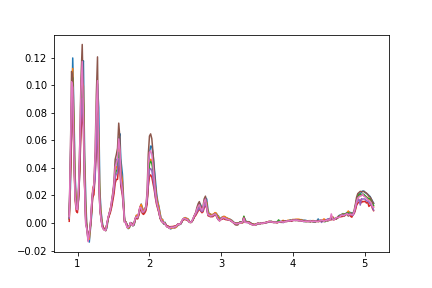

In [7]:
%matplotlib widget
for spectrum in spectra_list:
    plt.plot(vims_wave,spectrum)
plt.show()

0       1.655507e+08
1       1.669459e+08
2       1.669459e+08
3       1.669459e+08
4       1.669459e+08
            ...     
2502    1.669296e+08
2503    1.888684e+08
2504    1.888799e+08
2505    1.888799e+08
2506    1.888695e+08
Name: ettime, Length: 2507, dtype: float64